# Hannah Ludbrook

# Research question/interests
# Analysis Question 1:
## Why is there such a variation in the way data is collected for guardianship filings in the United States?

### Look into why we only have this information for some states and why some states don't separate their adult and child case filings

## The dataset
A dataset describing the adult guardianship filings in US courts

In [22]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns#Understanding my variables 

%matplotlib inline

df = pd.read_csv('filing_counts.csv')

# set identifier "case_type" as string
df["case_type"] = df["case_type"].astype("str")

#Remove columns that I dont need
DeleteList=['for_total', 'case_action', 'year']
df=df.drop(DeleteList, axis=1)

# set categorial data
df["case_type"] = df ["case_type"].astype("category")
df["age_group"] = df ["age_group"].astype("category")
df["state"] = df ["state"].astype("category")

Preview of data:


,state,case_type,age_group,count
0,Alaska,G+C+Joint,Adults+Minors,1171
1,Alaska,G+C+Joint,Adults+Minors,1084
2,Alaska,G+C+Joint,Adults+Minors,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   state      380 non-null    category
 1   case_type  380 non-null    category
 2   age_group  380 non-null    category
 3   count      380 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 5.9 KB
None

***Number of duplicated entries:  16


,state,case_type,age_group,count
71,District of Columbia,Conservatorship ONLY,Minors ONLY,1
79,District of Columbia,Conservatorship ONLY,Minors ONLY,1
97,Idaho,Conservatorship ONLY,Minors ONLY,42
103,Idaho,Conservatorship ONLY,Minors ONLY,42
99,Idaho,Joint G/C ONLY,Minors ONLY,61



To check: 
Unique count of non-numeric data

state        37
case_type     4
age_group     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        Joint G/C ONLY     56
 
Top 5 unique values of age_group
       age_group  Count
0    Adults ONLY    149
1    Minors ONLY    118
2  Adults+Minors    100
3      Ambiguous     13
 


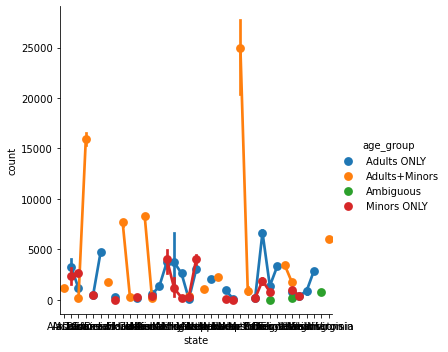

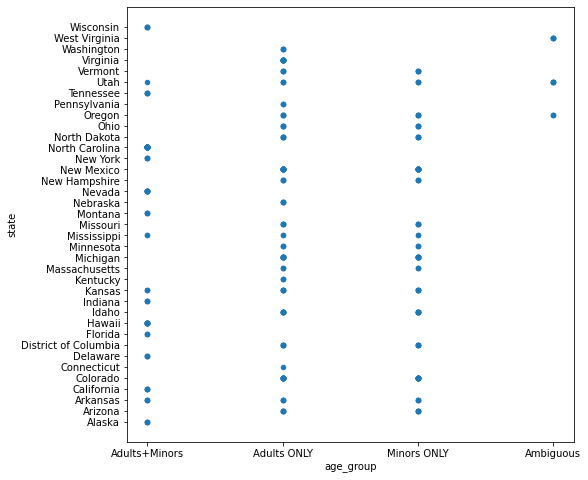

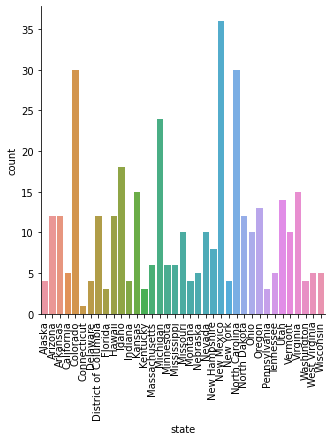

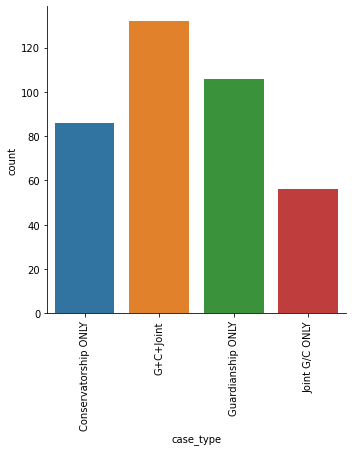

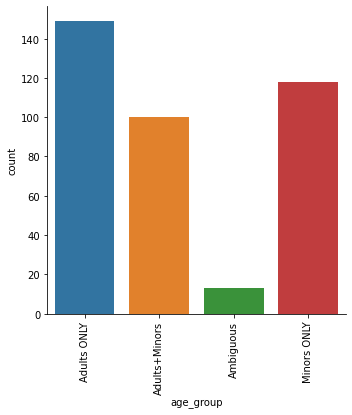

In [142]:
# Display data in different graphs and figures
eda(df)


The information we gathered was courtesy of buzzfeed who utilized court documents, mental health filings and financial records, guardianship cases and gathered data from public records to create their dataset and article about guardianship in USA. As of now there is no federal standard for tracking adult guardianship cases and there for the state systems are very scattered and not sorted in the same way. This makes drawing conclusions about the guardianship system in the country overall very difficult. Buzzfeed was able to compile exstensive data which I was able to further manipulate in order to explore the variation of the data collection in different states. 

As I went into my EDA I experiemented with a few different data visulizations to get the information I needed. I knew the 3 columns that would be of most help to me would be age_group, case_type and state because they would be able to show me the variation in record keeping in different states. I created a countplot that showed the case counts for the four different age groups in the study, this showed that although the highest count was adults only (which is what the Buzzfeed study was seeking out) alot of cases were held only in files of adults and minors combined making it even more difficult to analyze the data. I also created a countplot to show the case types and their numbers and there was also a large variation here as a lot of states hold cases of guardianship and conservatorship together. I then created a scatter plot graph to show how each state held their records for age groups and some held seperate record for adults and minors, some held the records seperate and some had only ambiguous records that didnt make any differentiation in the age groups.

My data figures proved that the variation in record keeping did exist so then I went and looked into some more research in this topic to see why this was the case and the impact that it had. Based on the articles I read I discovered that many guardianship cases taken to court are included in a more genaric case type group and there for cannot be distinguished as adult cases and child cases. This variation of data makes it very difficult to understand the trends of guardianship, although some research suggests that the number of adults under guardianship is growing there is no way to know for sure because of the discrepencies in record keeping. This is a huge issue because there are many cases of negelect and mistreatment of adults under guardianship but we have no way of tracking this if we dont have accurate record keeping. 

The variation in state data is the result of not having a standardized system of adult guardianship cases that enter and exit the courts. As states hold their records differently it is extremely difficult to draw conclusions on the data. This leaves room for abuse and neglect to those under guardianship with very little consequences to the guardians.


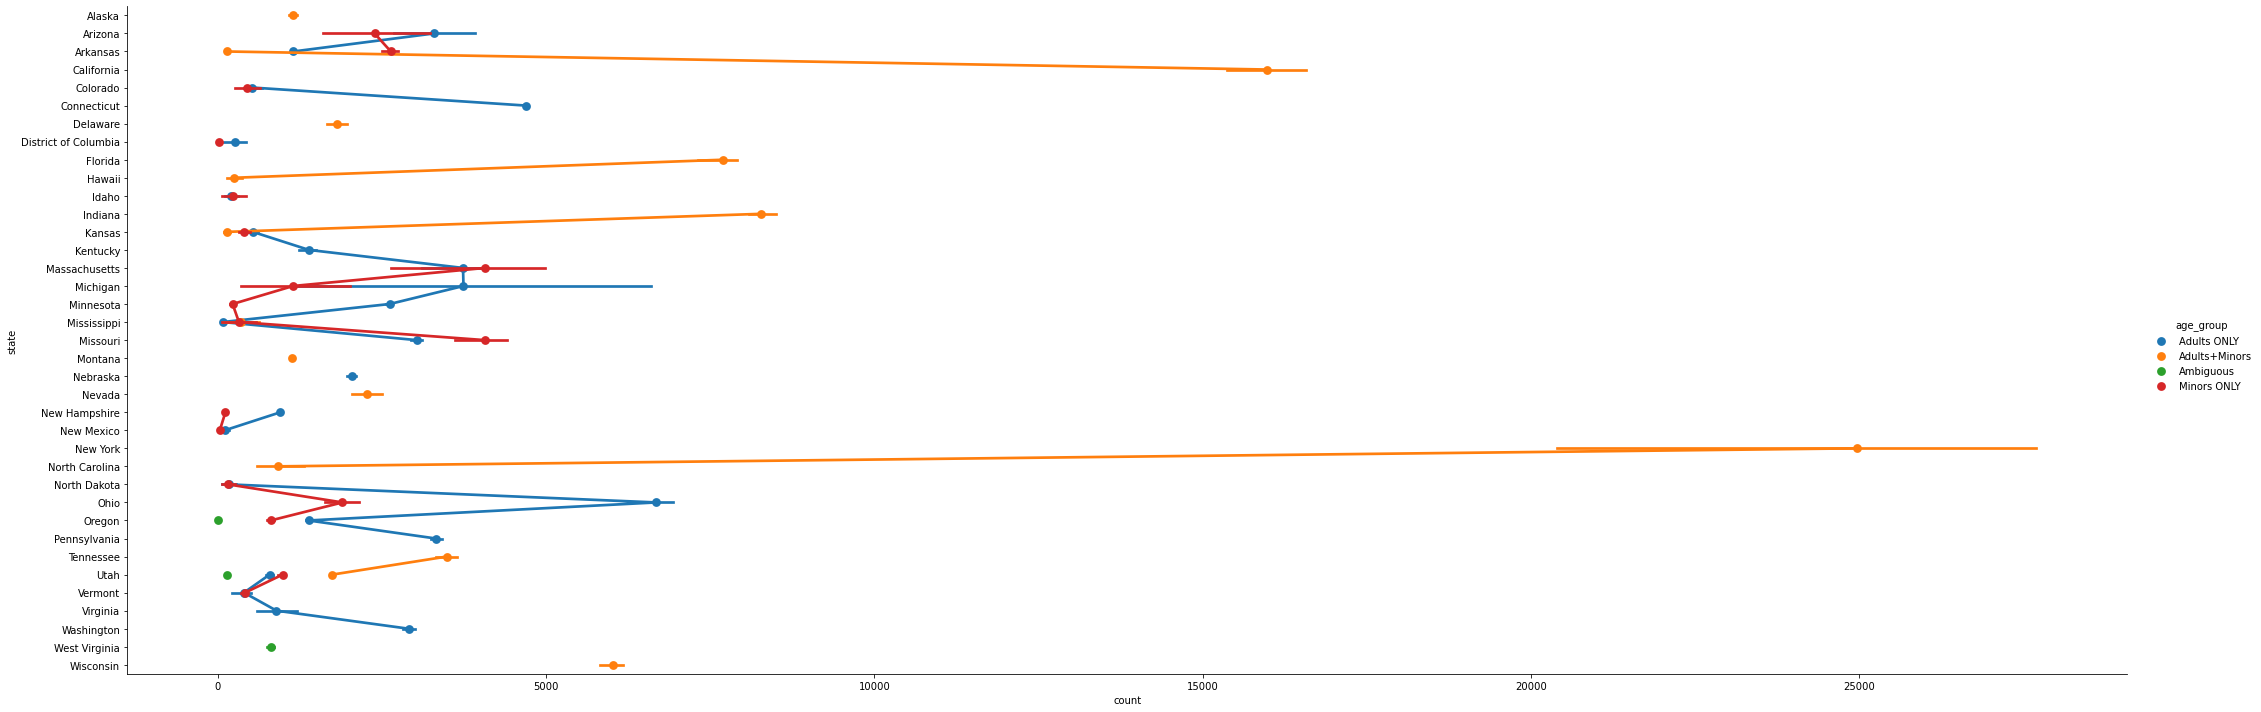

In [128]:

sns.catplot(x="count", y="state", hue="age_group", kind="point", data=df, height=10, aspect=3, rotate=60, ha="right")


In [18]:
import pandas as pd
import numpy as np


df = (
    pd.read_csv('filing_counts.csv')   
    .drop('for_total',axis=1)
    .drop('case_action',axis=1)
    .assign(state_agegroup=lambda x: x['age_group']+x['state'])
)





In [150]:
   
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    
    sns.catplot(x="count", y="state", hue="age_group", kind="point", data=df, height=10, aspect=3, rotate=60, ha="right")
    df.plot(kind="scatter", x="age_group", y="state", figsize=(8,8)
    

    


  # EDA of categorical data
  categorical_eda(df)
            
    
   

SyntaxError: invalid syntax (Temp/ipykernel_17900/4018333646.py, line 51)